## Fluid Dynamics and Navier-Stokes Equations

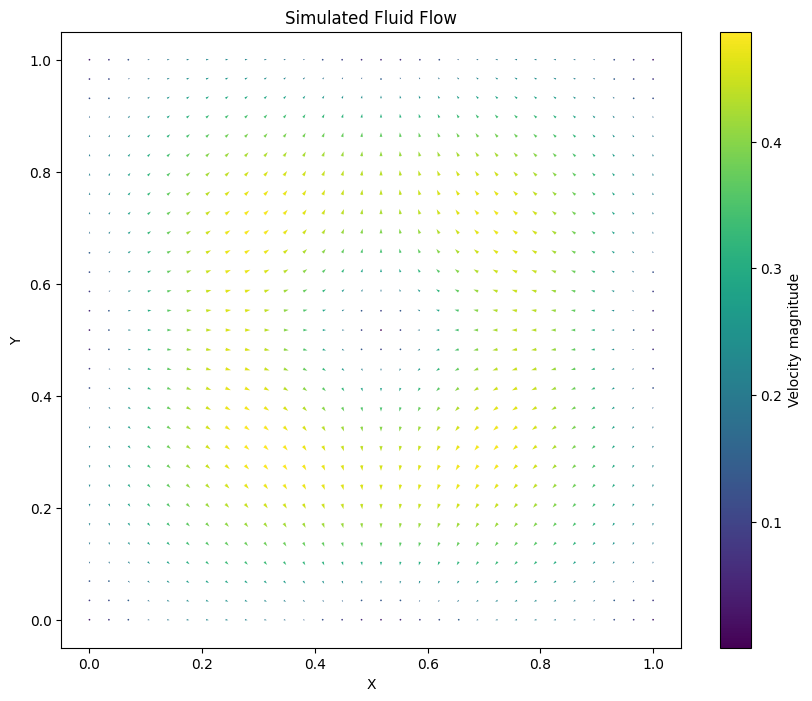

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_fluid_flow(grid_size, time_steps, viscosity, density):
    # grid points
    x = np.linspace(0, 1, grid_size)
    y = np.linspace(0, 1, grid_size)
    X, Y = np.meshgrid(x, y)

    # velocity fields with initial conditions
    u = np.zeros((grid_size, grid_size))
    v = np.zeros((grid_size, grid_size))

    # source of movement circular flow
    center = grid_size // 2
    for i in range(grid_size):
        for j in range(grid_size):
            dx = i - center
            dy = j - center
            distance = np.sqrt(dx**2 + dy**2)
            if distance > 0:
                u[i,j] = -dy/distance * np.exp(-distance/20)
                v[i,j] = dx/distance * np.exp(-distance/20)

    # time evolution
    for _ in range(time_steps):
        # simplified 2D Navier-Stokes solver
        laplacian_u = np.roll(u, 1, axis=0) + np.roll(u, -1, axis=0) + \
                      np.roll(u, 1, axis=1) + np.roll(u, -1, axis=1) - 4 * u
        laplacian_v = np.roll(v, 1, axis=0) + np.roll(v, -1, axis=0) + \
                      np.roll(v, 1, axis=1) + np.roll(v, -1, axis=1) - 4 * v

        u += viscosity * laplacian_u / density
        v += viscosity * laplacian_v / density

    return X, Y, u, v

# parameters' values
grid_size = 30
time_steps = 100
viscosity = 0.1
density = 1.0

X, Y, u, v = simulate_fluid_flow(grid_size, time_steps, viscosity, density)

# visualization
plt.figure(figsize=(10, 8))
plt.quiver(X, Y, u, v, np.sqrt(u**2 + v**2),
          cmap='viridis',
          scale=50,
          width=0.003)
plt.colorbar(label='Velocity magnitude')
plt.title("Simulated Fluid Flow")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Incompressible Navier-Stokes Equations

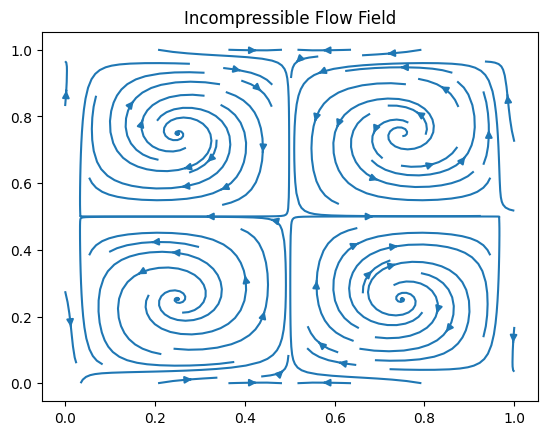

In [19]:
import numpy as np

def incompressible_navier_stokes(u, v, dx, dy, dt, viscosity):
    # spatial derivatives
    du_dx = np.gradient(u, dx, axis=1)
    du_dy = np.gradient(u, dy, axis=0)
    dv_dx = np.gradient(v, dx, axis=1)
    dv_dy = np.gradient(v, dy, axis=0)

    # Laplacians
    laplacian_u = np.gradient(du_dx, dx, axis=1) + np.gradient(du_dy, dy, axis=0)
    laplacian_v = np.gradient(dv_dx, dx, axis=1) + np.gradient(dv_dy, dy, axis=0)

    # updated velocities
    u_new = u - dt * (u * du_dx + v * du_dy) + dt * viscosity * laplacian_u
    v_new = v - dt * (u * dv_dx + v * dv_dy) + dt * viscosity * laplacian_v

    return u_new, v_new

# parameters' values
nx, ny = 50, 50
dx, dy = 1.0 / nx, 1.0 / ny
x, y = np.meshgrid(np.linspace(0, 1, nx), np.linspace(0, 1, ny))

u = np.sin(2 * np.pi * x) * np.cos(2 * np.pi * y)
v = -np.cos(2 * np.pi * x) * np.sin(2 * np.pi * y)

dt = 0.001
viscosity = 0.1

for _ in range(100):
    u, v = incompressible_navier_stokes(u, v, dx, dy, dt, viscosity)
# visualizations
import matplotlib.pyplot as plt
plt.streamplot(x, y, u, v)
plt.title("Incompressible Flow Field")
plt.show()

## Vorticity and Circulation

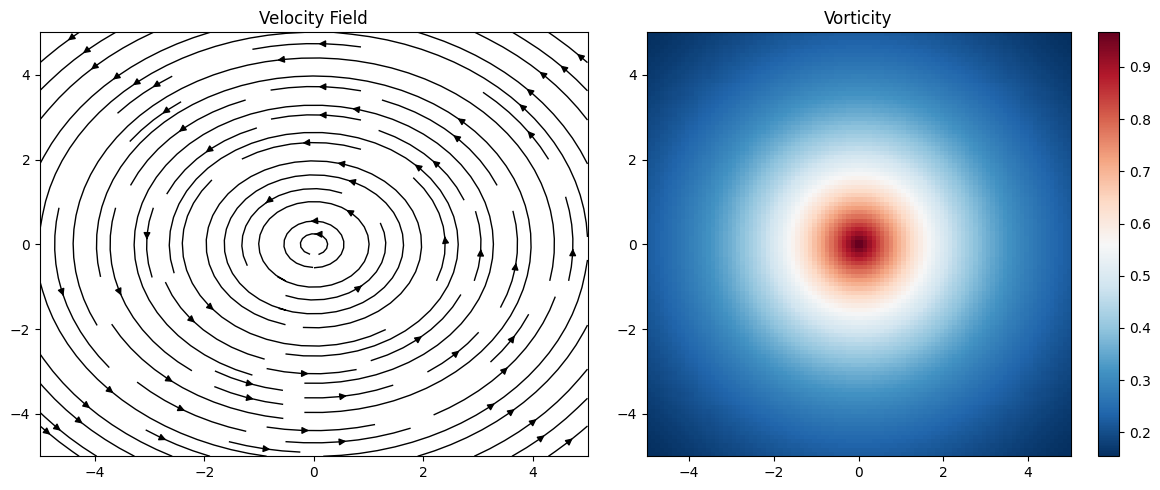

Total circulation: 33.4942


In [7]:
import numpy as np
import matplotlib.pyplot as plt

def compute_vorticity(u, v, dx, dy):
    dudy = np.gradient(u, dy, axis=0)
    dvdx = np.gradient(v, dx, axis=1)
    return dvdx - dudy

def compute_circulation(u, v, dx, dy):
    vorticity = compute_vorticity(u, v, dx, dy)
    return np.sum(vorticity) * dx * dy

# parameters' values
nx, ny = 100, 100
x = np.linspace(-5, 5, nx)
y = np.linspace(-5, 5, ny)
X, Y = np.meshgrid(x, y)

# vortex-like flow field
r = np.sqrt(X**2 + Y**2)
theta = np.arctan2(Y, X)
u = -np.sin(theta) * (1 - np.exp(-r/2))
v = np.cos(theta) * (1 - np.exp(-r/2))

vorticity = compute_vorticity(u, v, x[1]-x[0], y[1]-y[0])
circulation = compute_circulation(u, v, x[1]-x[0], y[1]-y[0])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.streamplot(X, Y, u, v, density=1, color='k', linewidth=1)
ax1.set_title("Velocity Field")
im = ax2.imshow(vorticity, extent=[x.min(), x.max(), y.min(), y.max()], cmap='RdBu_r')
ax2.set_title("Vorticity")
plt.colorbar(im, ax=ax2)
plt.tight_layout()
plt.show()

print(f"Total circulation: {circulation:.4f}")